In [2]:
import pandas as pd
import matplotlib.pyplot as plt

movie_df = pd.read_csv("movies_data.csv")

movie_df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,NaN,NaN,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,Crime,Drama,NaN,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,Crime,Drama,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,Crime,Drama,NaN,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,Crime,Drama,NaN,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   Subgenre       895 non-null    object 
 6   Subgenre 1     646 non-null    object 
 7   IMDB_Rating    1000 non-null   float64
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB


In [4]:
movie_df.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,Breakfast at Tiffany's,1961,A,115,Comedy,Drama,Romance,7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201,Drama,Western,NaN,7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118,Drama,Romance,War,7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97,Drama,War,NaN,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,The 39 Steps,1935,NaN,86,Crime,Mystery,Thriller,7.6,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


# Convert year from object to date

In [33]:
movie_df['Released_Year'] = pd.to_datetime(movie_df['Released_Year'], format='%Y')

In [34]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Series_Title   999 non-null    object        
 1   Released_Year  999 non-null    datetime64[ns]
 2   Certificate    898 non-null    object        
 3   Runtime        999 non-null    int64         
 4   Genre          999 non-null    object        
 5   Subgenre       894 non-null    object        
 6   Subgenre 1     645 non-null    object        
 7   IMDB_Rating    999 non-null    float64       
 8   Meta_score     842 non-null    float64       
 9   Director       999 non-null    object        
 10  Star1          999 non-null    object        
 11  Star2          999 non-null    object        
 12  Star3          999 non-null    object        
 13  Star4          999 non-null    object        
 14  No_of_Votes    999 non-null    int64         
 15  Gross          830 non-null 

In [18]:
len(movie_df)

1000

In [20]:
movie_df.isnull().sum()

Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
Subgenre         105
Subgenre 1       354
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [24]:
movie_df = movie_df.dropna(subset=['Released_Year', 'IMDB_Rating'])

In [26]:
len(movie_df)

999

In [27]:
genre_rating = movie_df.groupby('Genre')['IMDB_Rating'].mean().sort_values()
genre_rating

Genre
Family       7.800000
Thriller     7.800000
Comedy       7.901290
Horror       7.909091
Animation    7.930488
Biography    7.938636
Adventure    7.942254
Action       7.949419
Drama        7.957439
Film-Noir    7.966667
Mystery      7.975000
Fantasy      8.000000
Crime        8.016822
Western      8.350000
Name: IMDB_Rating, dtype: float64

In [30]:
yearly_ratings = movie_df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
print(yearly_ratings.head(10))

   Released_Year  IMDB_Rating
0         1920.0          8.1
1         1921.0          8.3
2         1922.0          7.9
3         1924.0          8.2
4         1925.0          8.1
5         1926.0          8.1
6         1927.0          8.2
7         1928.0          8.1
8         1930.0          8.0
9         1931.0          8.2


In [37]:
subset = movie_df.loc[0:9, ['Series_Title', 'Released_Year', 'IMDB_Rating']]
print(subset)

                                    Series_Title Released_Year  IMDB_Rating
0                       The Shawshank Redemption    1994-01-01          9.3
1                                  The Godfather    1972-01-01          9.2
2                                The Dark Knight    2008-01-01          9.0
3                         The Godfather: Part II    1974-01-01          9.0
4                                   12 Angry Men    1957-01-01          9.0
5  The Lord of the Rings: The Return of the King    2003-01-01          8.9
6                                   Pulp Fiction    1994-01-01          8.9
7                               Schindler's List    1993-01-01          8.9
8                                      Inception    2010-01-01          8.8
9                                     Fight Club    1999-01-01          8.8


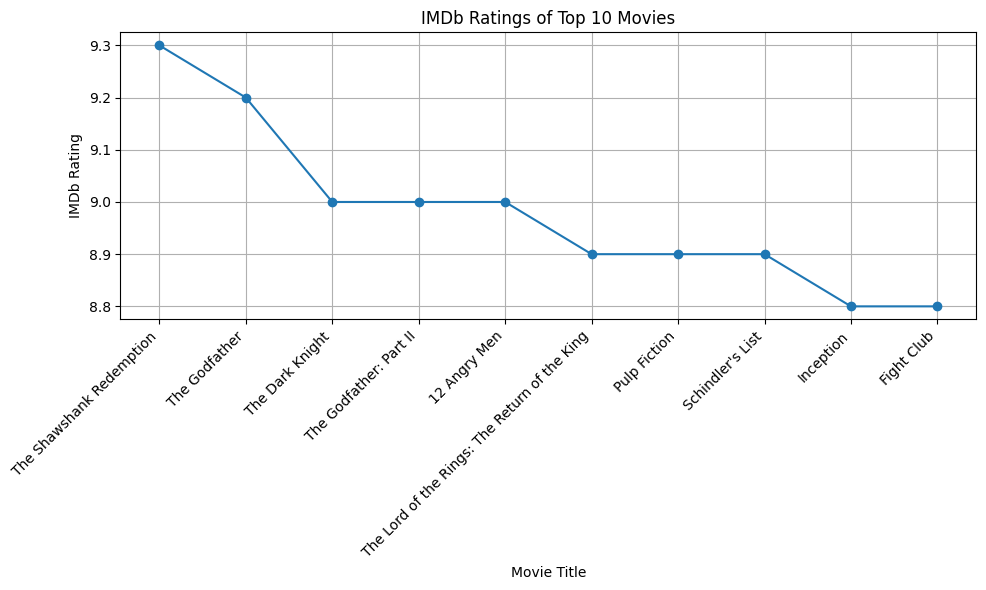

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(subset['Series_Title'], subset['IMDB_Rating'], marker='o')
plt.title('IMDb Ratings of Top 10 Movies')
plt.xlabel('Movie Title')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure()  

<Figure size 640x480 with 0 Axes>

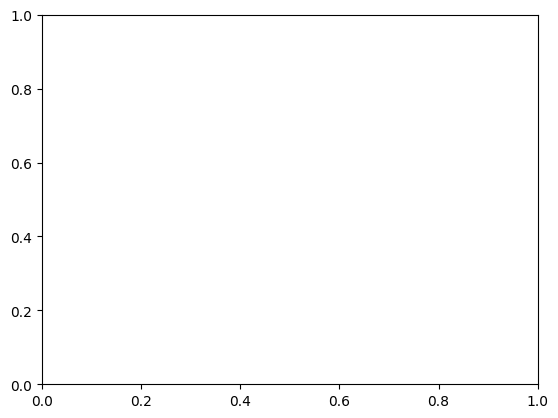

In [42]:
fig, axs = plt.subplots()

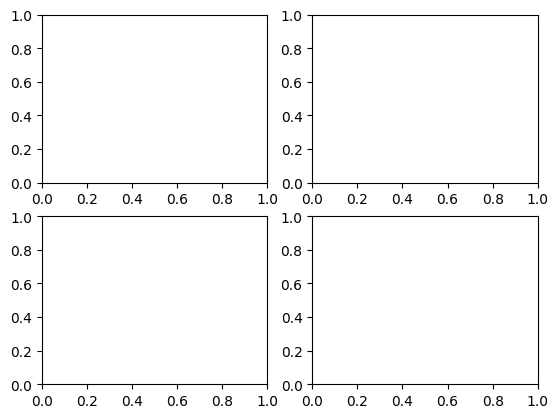

In [46]:
fig, axs = plt.subplots(2, 2)

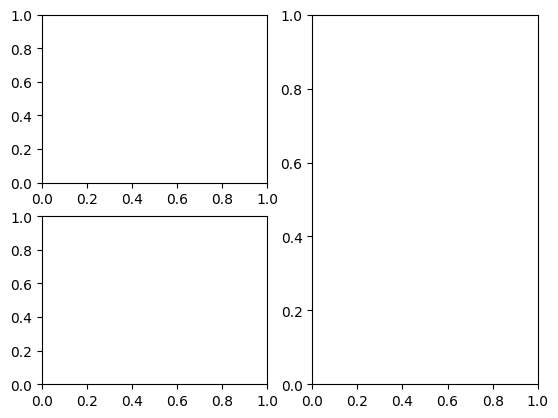

In [50]:
fig, axs = plt.subplot_mosaic([['left_top', 'right'],
                               ['left_bottom', 'right']])

Text(0.5, 0.98, 'Right subfigure')

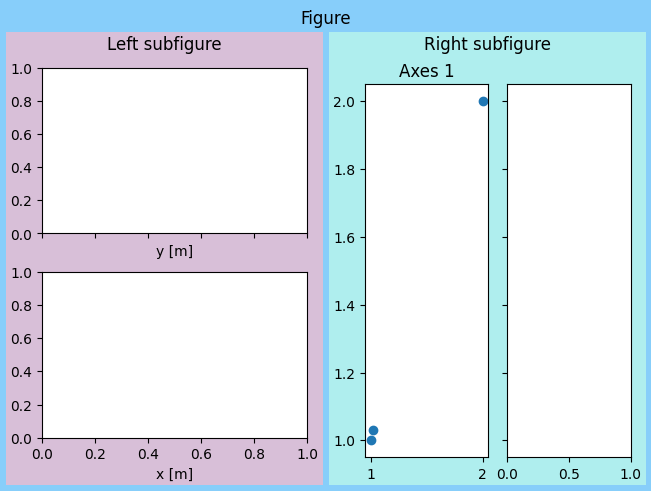

In [ ]:
fig = plt.figure(layout='constrained', facecolor='lightskyblue') # define parent figure
fig.suptitle('Figure') # Main title
figL, figR = fig.subfigures(1, 2) # Create sub figure left and right
figL.set_facecolor('thistle') # face color for left figure
axL = figL.subplots(2, 1, sharex=True) # Create 2 subplot left figure, share same x value
axL[1].set_xlabel('x [m]') # set label for left figure subplot 1
axL[0].set_xlabel('y [m]')
figL.suptitle('Left subfigure') # set titile for figure left
figR.set_facecolor('paleturquoise') 
axR = figR.subplots(1, 2, sharey=True)
axR[0].set_title('Axes 1')
axR[0].scatter([1,1.02,2],[1,1.03,2]) # plot right subplot 0 
figR.suptitle('Right subfigure')

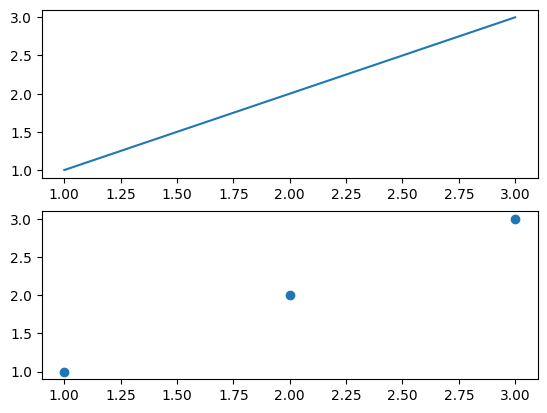

In [86]:
fig, ax = plt.subplots(2,1)
ax[0].plot([1,2,3],[1,2,3])
ax[1].scatter([1,2,3],[1,2,3]) 